<a href="https://colab.research.google.com/github/AaayaB4/ADL/blob/Exercises/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop, Adagrad, Adam
import matplotlib.pyplot as plt

In [5]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

x_train_cifar = x_train_cifar.astype('float32') / 255
x_test_cifar = x_test_cifar.astype('float32') / 255

y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar, 10)

170498071/170498071 [==============================] - 3s 0us/step


In [6]:
def train_model(optimizer, model, x_train, y_train, x_test, y_test):
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return  model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), verbose=2)

In [7]:
model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation="selu", input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation="selu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation="selu"),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

In [8]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
momentums = [0.7, 0.8, 0.9]
histories = []

for lr in learning_rates:
    for momentum in momentums:
        optimizer = SGD(learning_rate=lr, momentum=momentum)
        history = train_model(optimizer, model, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar)
        histories.append(history)

Epoch 1/10
391/391 - 13s - loss: 2.3698 - accuracy: 0.1179 - val_loss: 2.2308 - val_accuracy: 0.1669 - 13s/epoch - 34ms/step
Epoch 2/10
391/391 - 2s - loss: 2.2423 - accuracy: 0.1539 - val_loss: 2.1666 - val_accuracy: 0.1988 - 2s/epoch - 5ms/step
Epoch 3/10
391/391 - 2s - loss: 2.1714 - accuracy: 0.1872 - val_loss: 2.1113 - val_accuracy: 0.2386 - 2s/epoch - 6ms/step
Epoch 4/10
391/391 - 2s - loss: 2.1188 - accuracy: 0.2166 - val_loss: 2.0631 - val_accuracy: 0.2714 - 2s/epoch - 6ms/step
Epoch 5/10
391/391 - 2s - loss: 2.0761 - accuracy: 0.2349 - val_loss: 2.0234 - val_accuracy: 0.2902 - 2s/epoch - 5ms/step
Epoch 6/10
391/391 - 2s - loss: 2.0415 - accuracy: 0.2510 - val_loss: 1.9901 - val_accuracy: 0.3017 - 2s/epoch - 5ms/step
Epoch 7/10
391/391 - 2s - loss: 2.0112 - accuracy: 0.2656 - val_loss: 1.9607 - val_accuracy: 0.3197 - 2s/epoch - 5ms/step
Epoch 8/10
391/391 - 2s - loss: 1.9861 - accuracy: 0.2766 - val_loss: 1.9360 - val_accuracy: 0.3275 - 2s/epoch - 5ms/step
Epoch 9/10
391/391 - 

In [9]:
def plot_progress(model_history, title):
    plt.figure(figsize=(12, 4))

    # Plot for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(model_history.history['accuracy'], label='Training Accuracy', color='blue')  # Color for training accuracy
    plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy', color='green')  # Color for validation accuracy
    plt.title('Accuracy - ' + title)
    plt.legend()

    # Plot for loss
    plt.subplot(1, 2, 2)
    plt.plot(model_history.history['loss'], label='Training Loss', color='red')  # Color for training loss
    plt.plot(model_history.history['val_loss'], label='Validation Loss', color='orange')  # Color for validation loss
    plt.title('Loss - ' + title)
    plt.legend()

    plt.show()


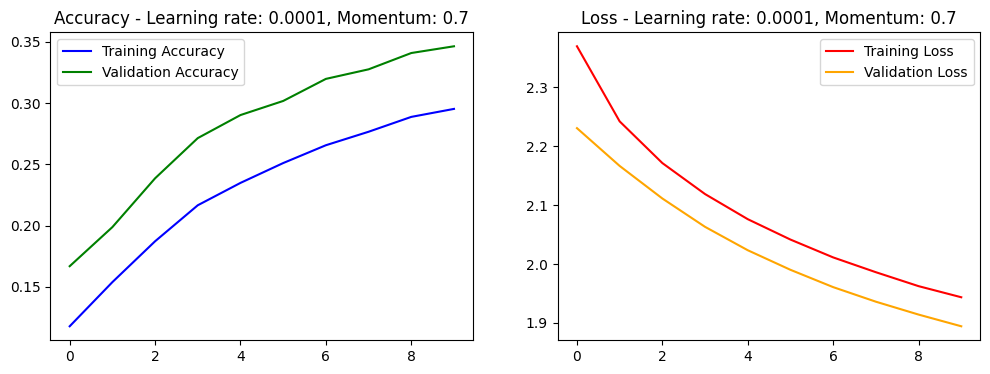

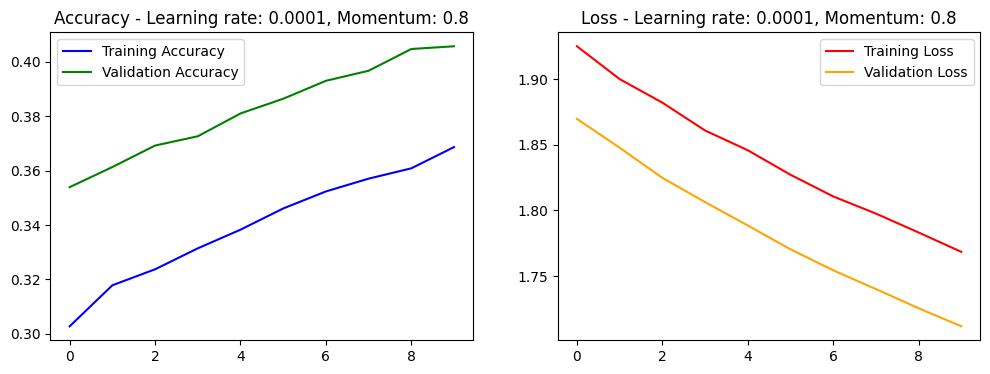

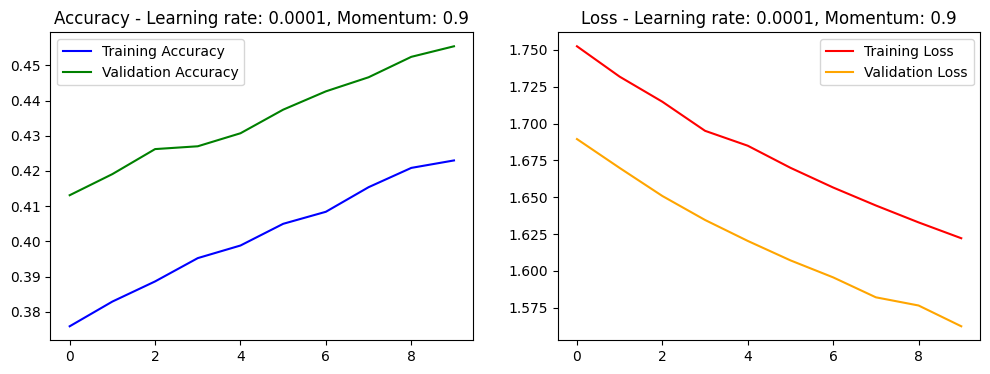

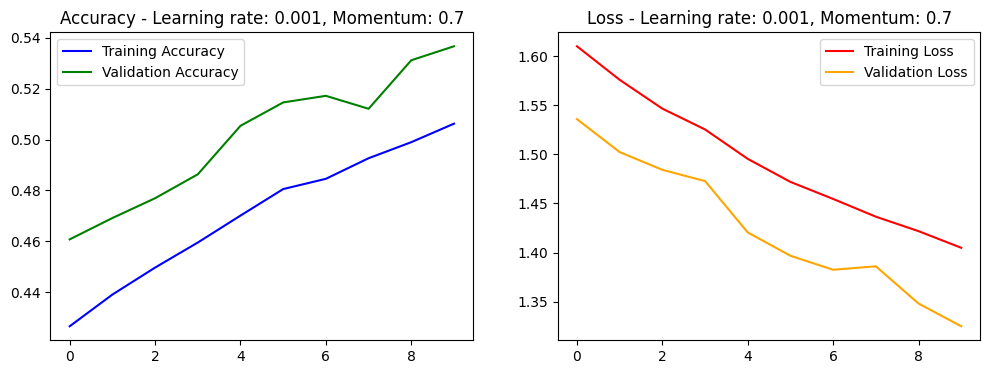

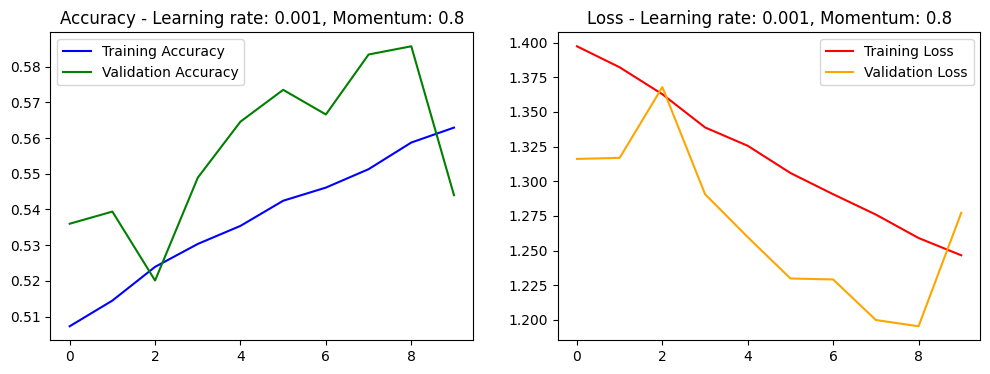

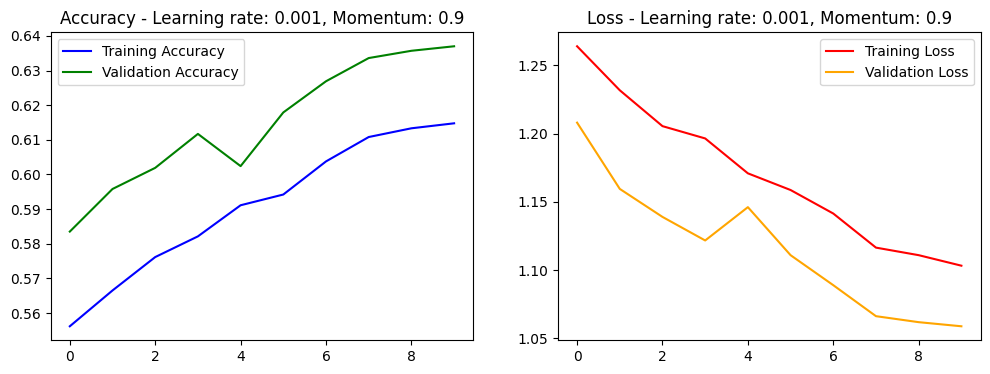

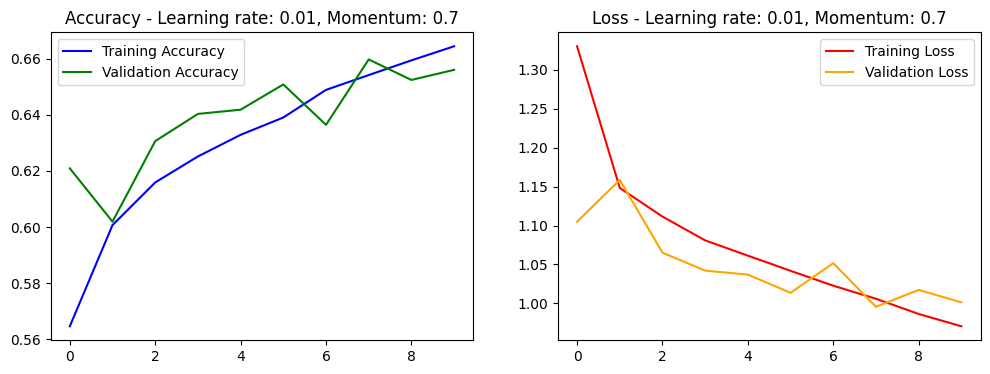

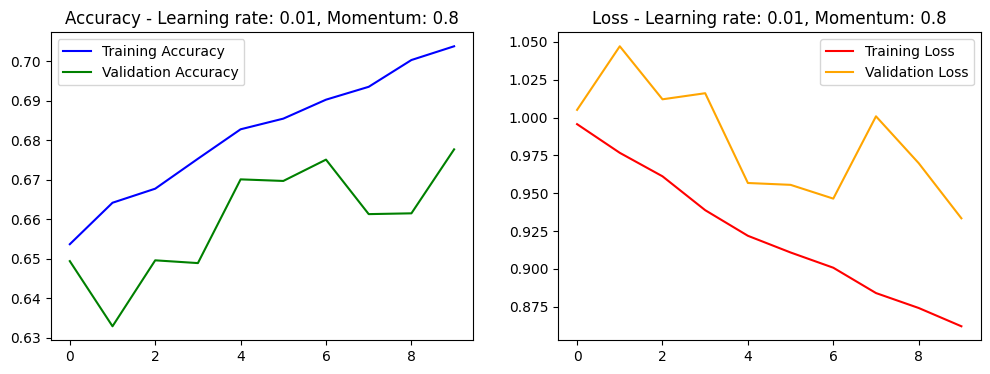

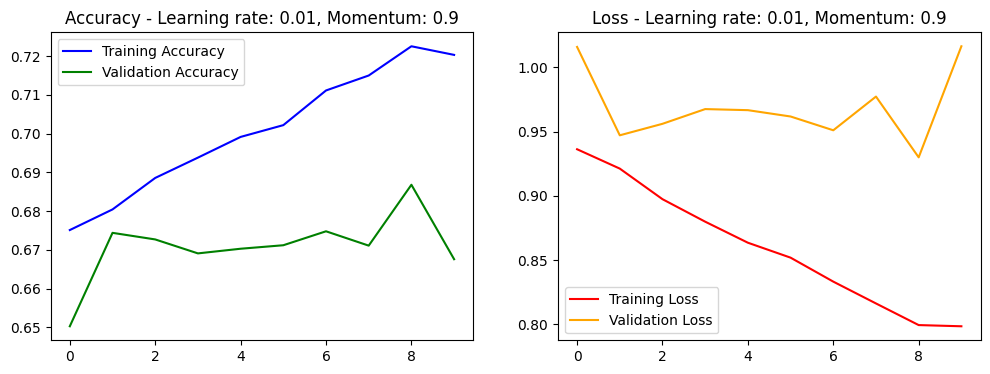

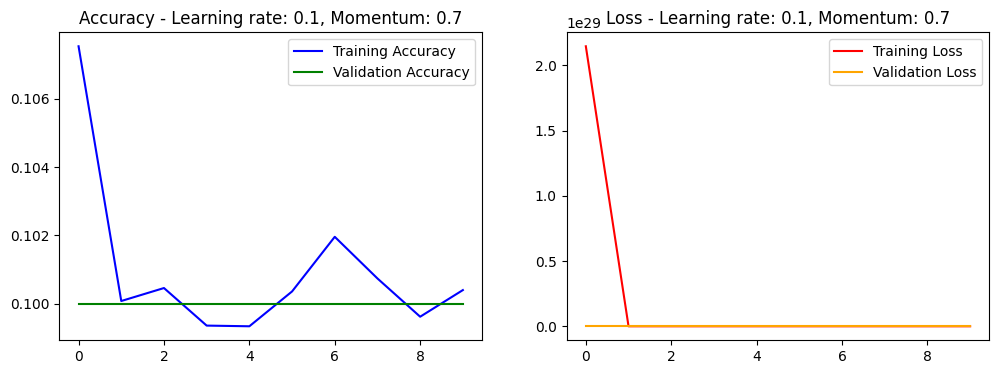

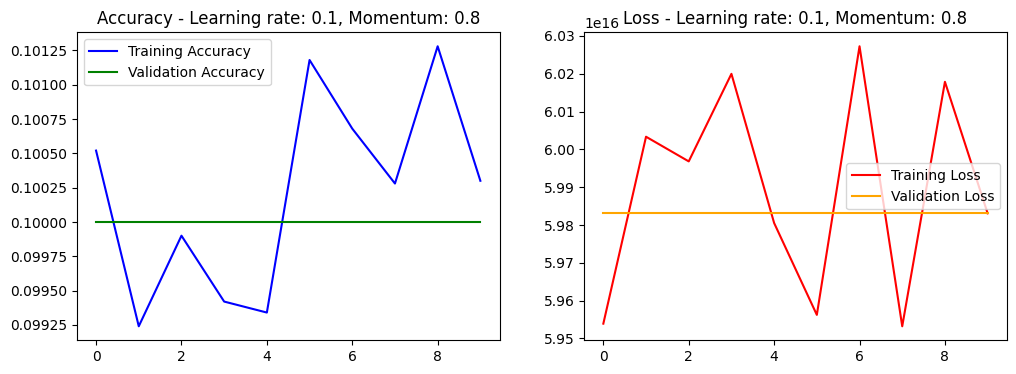

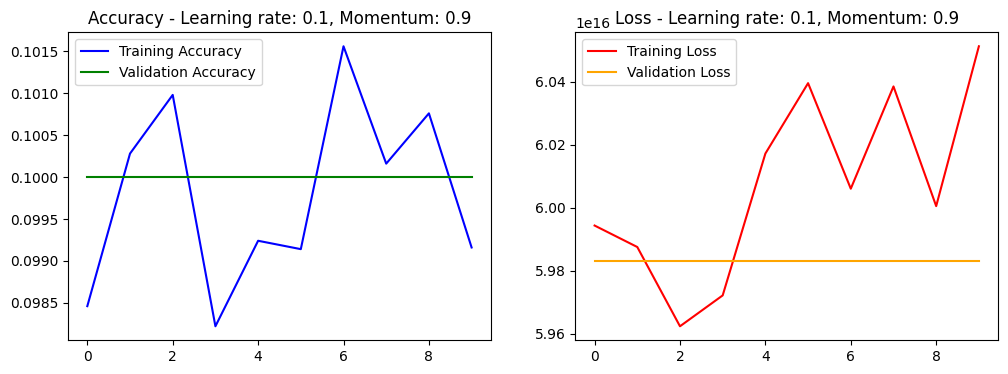

In [10]:
i = 0
for lr in learning_rates:
    for momentum in momentums:
        plot_progress(histories[i], f'Learning rate: {lr}, Momentum: {momentum}')
        i += 1

# **Graph 1 (Learning rate: 0.0001, Momentum: 0.7)**
**Training vs. Validation Accuracy:** The training accuracy is consistently below the validation accuracy. This could suggest that the model is underfitting since it is not performing as well on the training data as it could. The validation accuracy surpasses the training accuracy, which is unusual and may indicate that the validation set is not challenging enough or not representative of the problem space.

**Training vs. Validation Loss:** The training loss is higher than the validation loss throughout the training process. This is an unusual pattern, as we would typically expect the training loss to be lower because the model is directly learning from this data. This again could suggest issues with the representativeness of the validation set or potential data leakage.

# **Graph 2 (Learning rate: 0.0001, Momentum: 0.8)**
**Training vs. Validation Accuracy:** In this graph, the training accuracy is again lower than the validation accuracy. The trend is similar to Graph 1, indicating underfitting or issues with the dataset.

**Training vs. Validation Loss:** The training loss starts higher and ends slightly lower than the validation loss. This is a more expected pattern, suggesting the model is starting to fit the training data better over time.

# **Graph 3 (Learning rate: 0.0001, Momentum: 0.9)**
**Training vs. Validation Accuracy:** The training accuracy is significantly lower than the validation accuracy, which is consistent with the previous graphs. The model's performance is not improving adequately on the training data.

**Training vs. Validation Loss:** The training loss decreases and eventually falls below the validation loss, indicating a better fit on the training data than on the unseen validation data.

# **Graph 4 (Learning rate: 0.001, Momentum: 0.7)**
**Training vs. Validation Accuracy:** The training accuracy is closely following the validation accuracy, but it's still slightly lower. This may suggest that increasing the learning rate has helped the model to learn better, but underfitting might still be present.

**Training vs. Validation Loss:** The training and validation loss decrease together, and the training loss is getting closer to the validation loss, which is a positive sign.

# **Graph 5 (Learning rate: 0.001, Momentum: 0.8)**
**Training vs. Validation Accuracy:** Here, the training accuracy is much closer to the validation accuracy compared to the previous graphs, which could indicate that the model is starting to generalize better.

**Training vs. Validation Loss:** The training loss starts higher but decreases below the validation loss, which is a pattern we expect during the training of a well-fitting model.

# **Graph 6 (Learning rate: 0.001, Momentum: 0.9)**
**Training vs. Validation Accuracy:** The training accuracy is closer to the validation accuracy but still slightly lower. The general trend is upward, which is good.

**Training vs. Validation Loss:** The training loss starts higher than the validation loss but ends up lower, suggesting the model is fitting well.

# **Graph 7 (Learning rate: 0.01, Momentum: 0.7)**
**Training vs. Validation Accuracy:** The training accuracy is highly volatile, which might be due to the high learning rate causing instability in learning.

**Training vs. Validation Loss:** The training loss is similarly volatile, which supports the idea that the learning rate might be too high.

# **Graph 8 (Learning rate: 0.01, Momentum: 0.8)**
**Training vs. Validation Accuracy:** The training accuracy shows some volatility, which might suggest the model's learning is unstable. The learning rate may still be too high, causing the model to not converge smoothly.

**Training vs. Validation Loss:** The training loss is volatile and ends up above the validation loss, which is not ideal.

# **Graph 9 (Learning rate: 0.01, Momentum: 0.9)**
**Training vs. Validation Accuracy:** There is significant volatility in the training accuracy, which is not ideal. This suggests that the model's learning is not stable.

**Training vs. Validation Loss:** The training loss is highly erratic, further indicating issues with model training stability.



---
# **Summary**

Across the graphs, there are a few consistent trends:

Lower learning rates (0.0001) tend to produce underfitting, with validation metrics surpassing training metrics.
A learning rate of 0.001 seems to provide a better balance, with training and validation metrics converging more closely.
The highest learning rate (0.01) introduces significant volatility, suggesting it is too high and causing instability in learning.
Increasing momentum seems to have a mixed effect, helping in some cases and introducing volatility in others.


In [11]:
i = 0
for lr in learning_rates:
    for momentum in momentums:
        print(f'lr: {lr}, Mmtm: {momentum},'
              f'training accuracy: {histories[i].history["accuracy"][-1]:.2f} '
              f'training loss: {histories[i].history["loss"][-1]:.2f} '
              f'validation accuracy: {histories[i].history["val_accuracy"][-1]:.2f} '
              f'validation loss: {histories[i].history["val_loss"][-1]:.2f}')
        i += 1

lr: 0.0001, Mmtm: 0.7,training accuracy: 0.30 training loss: 1.94 validation accuracy: 0.35 validation loss: 1.89
lr: 0.0001, Mmtm: 0.8,training accuracy: 0.37 training loss: 1.77 validation accuracy: 0.41 validation loss: 1.71
lr: 0.0001, Mmtm: 0.9,training accuracy: 0.42 training loss: 1.62 validation accuracy: 0.46 validation loss: 1.56
lr: 0.001, Mmtm: 0.7,training accuracy: 0.51 training loss: 1.40 validation accuracy: 0.54 validation loss: 1.32
lr: 0.001, Mmtm: 0.8,training accuracy: 0.56 training loss: 1.25 validation accuracy: 0.54 validation loss: 1.28
lr: 0.001, Mmtm: 0.9,training accuracy: 0.61 training loss: 1.10 validation accuracy: 0.64 validation loss: 1.06
lr: 0.01, Mmtm: 0.7,training accuracy: 0.66 training loss: 0.97 validation accuracy: 0.66 validation loss: 1.00
lr: 0.01, Mmtm: 0.8,training accuracy: 0.70 training loss: 0.86 validation accuracy: 0.68 validation loss: 0.93
lr: 0.01, Mmtm: 0.9,training accuracy: 0.72 training loss: 0.80 validation accuracy: 0.67 valid

In [12]:
best_lr = 0.01
best_momentum = 0.95

In [13]:
optimizers = {"RMSprop": RMSprop(learning_rate=best_lr, momentum=best_momentum), "Adagrad": Adagrad(learning_rate=best_lr), "Adam": Adam(learning_rate=best_lr)}

optimizer_histories = {"RMSprop": None, "Adagrad": None, "Adam": None}

for key in optimizers.keys():
    history = train_model(optimizers[key], model, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar)
    optimizer_histories[key] = history

Epoch 1/10
391/391 - 4s - loss: 59746121823551488.0000 - accuracy: 0.0975 - val_loss: 59831089161568256.0000 - val_accuracy: 0.1000 - 4s/epoch - 10ms/step
Epoch 2/10
391/391 - 2s - loss: 59584300340740096.0000 - accuracy: 0.1001 - val_loss: 59831089161568256.0000 - val_accuracy: 0.1000 - 2s/epoch - 5ms/step
Epoch 3/10
391/391 - 2s - loss: 60097819515551744.0000 - accuracy: 0.0985 - val_loss: 59831089161568256.0000 - val_accuracy: 0.1000 - 2s/epoch - 5ms/step
Epoch 4/10
391/391 - 2s - loss: 59676448864075776.0000 - accuracy: 0.0979 - val_loss: 59831089161568256.0000 - val_accuracy: 0.1000 - 2s/epoch - 6ms/step
Epoch 5/10
391/391 - 2s - loss: 59611019332288512.0000 - accuracy: 0.0992 - val_loss: 59831089161568256.0000 - val_accuracy: 0.1000 - 2s/epoch - 6ms/step
Epoch 6/10
391/391 - 2s - loss: 60103626311335936.0000 - accuracy: 0.0993 - val_loss: 59831089161568256.0000 - val_accuracy: 0.1000 - 2s/epoch - 5ms/step
Epoch 7/10
391/391 - 2s - loss: 60073583015100416.0000 - accuracy: 0.1001 -

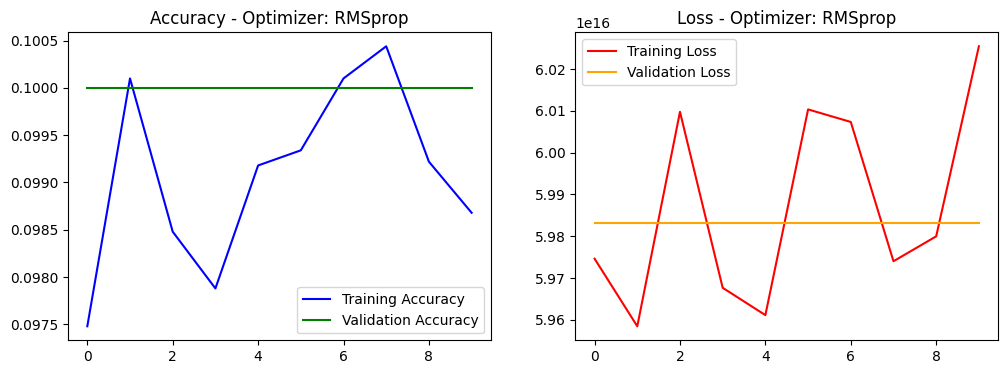

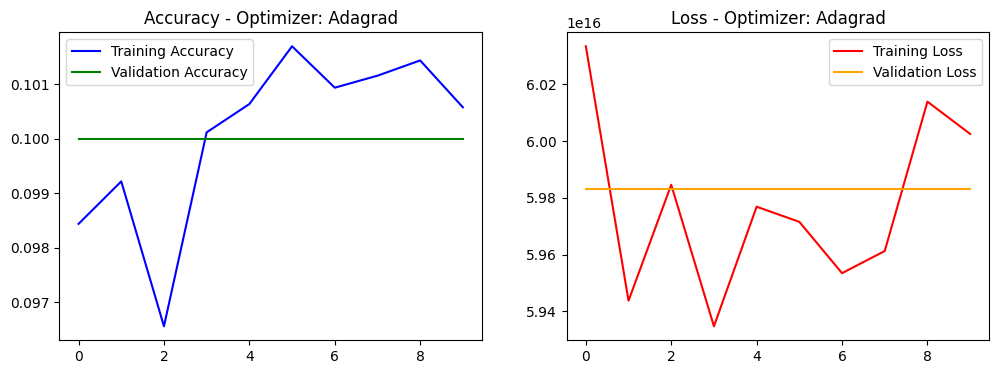

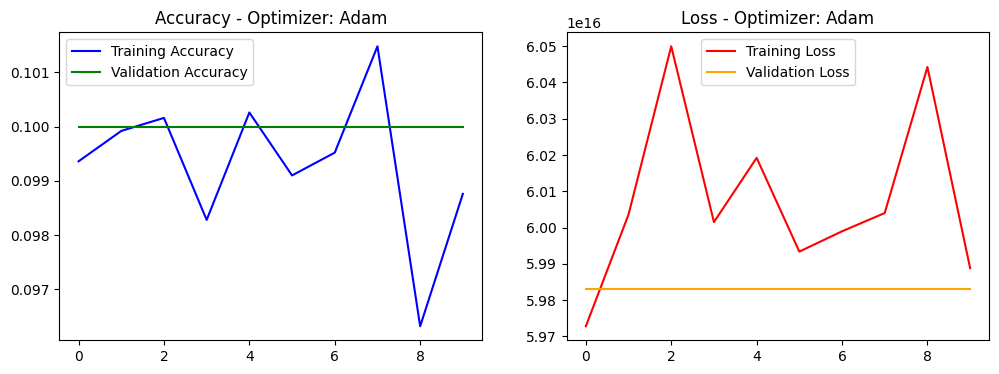

In [14]:
for key in optimizer_histories.keys():
    plot_progress(optimizer_histories[key], f'Optimizer: {key}')

# **RMSProp Optimizer Analysis**
**Accuracy:** The training accuracy exhibits significant volatility, indicating that RMSProp is aggressively adjusting the weights. The validation accuracy is almost constant, suggesting the model may not be learning effectively from the training data or that the validation set does not capture the complexity of the data.

**Loss:** The loss graph shows high variability in the training loss, with some extreme spikes. This could be due to the adaptive learning rate nature of RMSProp, which adjusts the learning rate based on the recent gradients. The validation loss remains relatively constant, mirroring the pattern seen in the accuracy graph.

# **Adagrad Optimizer Analysis**
**Accuracy:** Adagrad shows a smoother curve for training accuracy compared to RMSProp, which suggests more stable learning. However, the validation accuracy remains flat, which could again indicate issues with the validation set or the model's inability to generalize.

**Loss:** Similar to RMSProp, the training loss is volatile, but the spikes are less extreme. Adagrad adjusts the learning rate based on the sum of the squares of the gradients, which can lead to a continuously decreasing learning rate, potentially causing the training to stall.

# **Adam Optimizer Analysis**
**Accuracy:** Adam's training accuracy also demonstrates volatility but with a general upward trend, which could be indicative of better learning over time. The validation accuracy, however, does not show improvement, which is consistent with the other optimizers, suggesting a possible issue with the validation data or model's capacity.

**Loss:**The training loss for Adam is very erratic, which might suggest that the moments and adaptive learning rates are causing large updates in some iterations. The validation loss is flat, like in the previous optimizers.